# Week6: PCA & FA

In [1]:
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.precision',3)
import seaborn as sns
%matplotlib inline

In [2]:
wine = pd.read_csv(r'C:\Users\njj06\Downloads\wine.csv', header = None) #14x14, 열 이름 포함되지 않은 데이터
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine.columns = ['name','alcohol','malicAcid','ash','ashalcalinity','magnesium',
                'totalPhenols','flavanoids','nonFlavanoidPhenols','proanthocyanins',
                'colorIntensity','hue','od280_od315','proline']
wine.head(5)

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# 결측치 확인 (NA) -> 없다.
wine.isna().sum()

name                   0
alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64

In [5]:
wine.describe()

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,1.938,13.001,2.336,2.367,19.495,99.742,2.295,2.029,0.362,1.591,5.058,0.957,2.612,746.893
std,0.775,0.812,1.117,0.274,3.340,14.282,0.626,0.999,0.124,0.572,2.318,0.229,0.710,314.907
min,1.000,11.030,0.740,1.360,10.600,70.000,0.980,0.340,0.130,0.410,1.280,0.480,1.270,278.000
25%,1.000,12.362,1.603,2.210,17.200,88.000,1.742,1.205,0.270,1.250,3.220,0.782,1.938,500.500
50%,2.000,13.050,1.865,2.360,19.500,98.000,2.355,2.135,0.340,1.555,4.690,0.965,2.780,673.500
75%,3.000,13.678,3.083,2.558,21.500,107.000,2.800,2.875,0.438,1.950,6.200,1.120,3.170,985.000
max,3.000,14.830,5.800,3.230,30.000,162.000,3.880,5.080,0.660,3.580,13.000,1.710,4.000,1680.000


# PCA

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #for scaling

X = wine.iloc[:,1:] 
y = wine.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123, stratify = y)
# stratify=y : 나눠진 데이터도 원자료의 비율을 따른다. 여기서는 y의 class 비율.

# PCA할때는 scaling 꼭 해줘야됨!
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

C:\Users\njj06\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\njj06\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\njj06\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\njj06\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [7]:
# eigenvalues and eigenvectors
# eigenvalue의 크기 순으로 재배열 해줄거야

X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=wine.columns[1:])
cov_mat = np.cov(X_train_scaled.T)
eig_vals, eigvecs = np.linalg.eig(cov_mat)
eig_vals_s = sorted(eig_vals, reverse=True)
eig_vals_s

[4.892679500939597,
 2.4608503376537256,
 1.5230183470998415,
 0.952753904378899,
 0.8313412106403766,
 0.5678215651286187,
 0.5009709173547725,
 0.37366049730166373,
 0.2679129458257205,
 0.2556366468100889,
 0.20175528788966957,
 0.17818150436652608,
 0.09910839152108603]

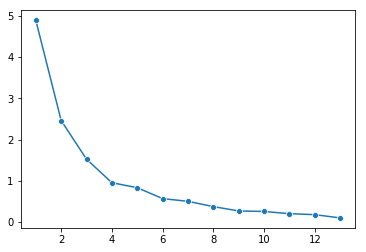

In [8]:
# visualization

sns.lineplot(x = range(1,14), y = eig_vals_s, marker ='o')

In [9]:
# Principal Component

from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_train_scaled)

np.cumsum(pca.explained_variance_ratio_)
# eigenvalue가 1 이상인 3개의 component로는 설명력이 떨어지므로, 4개 선정.
# 네번째 값도 1에 가까운 값을 가지고 있으므로 유의할 것. 

array([0.373, 0.561, 0.677, 0.75 , 0.813, 0.857, 0.895, 0.923, 0.944,
       0.963, 0.979, 0.992, 1.   ])

In [10]:
# Model Selection

# Logistic Regression

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression as LR

Logit_pca = Pipeline([('scaler', StandardScaler()),
                     ('pca', PCA(n_components=4)),
                     ('LR', LR(solver='sag', max_iter=10000, multi_class='auto'))])

Logit_pca.fit(X_train, y_train)

print('Logit PCA Train :', Logit_pca.score(X_train, y_train))
print('Logit PCA Test :', Logit_pca.score(X_test, y_test))

# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

LDA_pca = Pipeline([('scaler', StandardScaler()),
                     ('pca', PCA(n_components=4)),
                     ('LDA', LDA())])
LDA_pca.fit(X_train, y_train)

print('LDA PCA Train :', LDA_pca.score(X_train, y_train))
print('LDA PCA Test :', LDA_pca.score(X_test, y_test))

# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

QDA_pca = Pipeline([('scaler', StandardScaler()),
                     ('pca', PCA(n_components=4)),
                     ('QDA', QDA())])
QDA_pca.fit(X_train, y_train)

print('QDA PCA Train :', QDA_pca.score(X_train, y_train))
print('QDA PCA Test :', QDA_pca.score(X_test, y_test))


# feature extraction(logistic regression with polynomial feature)
from sklearn.preprocessing import PolynomialFeatures

for i in range(1,4):
    Logit_poly_pca =  Pipeline([('scaler', StandardScaler()),
                                ('pca', PCA(n_components=4)),
                                ('poly', PolynomialFeatures(degree=i, include_bias=False)),
                                ('LR', LR(solver='sag', max_iter=10000, multi_class='auto'))])
    Logit_poly_pca.fit(X_train, y_train)
    
    print('Logit %d Poly PCA Train :' %i, Logit_poly_pca.score(X_train, y_train))
    print('Logit %d Poly PCA Test :' %i, Logit_poly_pca.score(X_test, y_test))
                            

C:\Users\njj06\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\njj06\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\njj06\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\njj06\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\njj06\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 wer

Logit PCA Train : 0.9758064516129032
Logit PCA Test : 0.9629629629629629
LDA PCA Train : 0.967741935483871
LDA PCA Test : 0.9814814814814815
QDA PCA Train : 0.9919354838709677
QDA PCA Test : 0.9629629629629629
Logit 1 Poly PCA Train : 0.9758064516129032
Logit 1 Poly PCA Test : 0.9629629629629629


C:\Users\njj06\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\njj06\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\njj06\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\njj06\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Logit 2 Poly PCA Train : 1.0
Logit 2 Poly PCA Test : 0.9074074074074074
Logit 3 Poly PCA Train : 1.0
Logit 3 Poly PCA Test : 0.9629629629629629


C:\Users\njj06\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\njj06\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


# FA

In [11]:
from sklearn.decomposition import FactorAnalysis as FA

fa = FA()
X_fa = fa.fit_transform(X)

df_fa = pd.DataFrame(data=X_fa)
df_fa.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.014,1.635,-0.973,-0.188,0.675,0.282,-0.224,0.0,0.0,0.0,0.0,0.0,0.0
1,0.965,-0.411,-1.859,-0.935,-0.337,0.218,-0.139,0.0,0.0,0.0,0.0,0.0,0.0
2,1.395,-0.495,0.211,0.645,0.470,0.110,0.126,0.0,0.0,0.0,0.0,0.0,0.0
3,2.335,0.016,0.223,0.008,0.941,0.205,0.215,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.037,1.410,0.093,0.744,0.434,0.305,-0.592,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
from factor_analyzer import FactorAnalyzer

fa_1 = FactorAnalyzer(rotation='varimax')
fa_1.fit(X)
ev, v = fa_1.get_eigenvalues()
xvals = range(1, X.shape[1]+1)

plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

ModuleNotFoundError: No module named 'factor_analyzer'

In [13]:
# Logistic Regression

Logit_fa = Pipeline([('fa', FA(n_components = 7)),
                    ('estimator', LR(solver='sag', max_iter=10000, multi_class='auto'))])
Logit_fa.fit(X_train, y_train)
Logit_fa.score(X_test, y_test)

print('Logit FA Train:', Logit_fa.score(X_train, y_train))
print('Logit FA Test :', Logit_fa.score(X_test, y_test))


# LDA

LDA_fa = Pipeline([('fa', FA(n_components = 7)), ('estimator', LDA())])
LDA_fa.fit(X_train, y_train)

print('LDA FA Train :', LDA_fa.score(X_train, y_train))
print('LDA FA Test :', LDA_fa.score(X_test, y_test))

# QDA

QDA_fa = Pipeline([('fa', FA(n_components = 7)), ('estimator', QDA())])
QDA_fa.fit(X_train, y_train)

print('QDA FA Train:', QDA_fa.score(X_train, y_train))
print('QDA FA Test:', QDA_fa.score(X_test, y_test))


# feature extraction

from sklearn.preprocessing import PolynomialFeatures
for i in range(1,4):
    Logit_poly_fa =  Pipeline([('scaler', StandardScaler()),
                                ('FA', FA(n_components=7)),
                                ('poly', PolynomialFeatures(degree=i, include_bias=False)),
                                ('LR', LR(solver='sag', max_iter=10000, multi_class='auto'))])
    Logit_poly_fa.fit(X_train, y_train)
    
    print('Logit %d Poly FA Train :' %i, Logit_poly_fa.score(X_train, y_train))
    print('Logit %d Poly FA Test :' %i, Logit_poly_fa.score(X_test, y_test))

Logit FA Train: 1.0
Logit FA Test : 1.0
LDA FA Train : 0.9838709677419355
LDA FA Test : 1.0
QDA FA Train: 1.0
QDA FA Test: 0.9814814814814815
Logit 1 Poly FA Train : 1.0
Logit 1 Poly FA Test : 0.9444444444444444


C:\Users\njj06\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\njj06\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\njj06\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\njj06\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\njj06\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 wer

Logit 2 Poly FA Train : 1.0
Logit 2 Poly FA Test : 0.9259259259259259
Logit 3 Poly FA Train : 1.0
Logit 3 Poly FA Test : 0.9629629629629629


C:\Users\njj06\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\njj06\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
